## LeNet-5 in TensorFlow

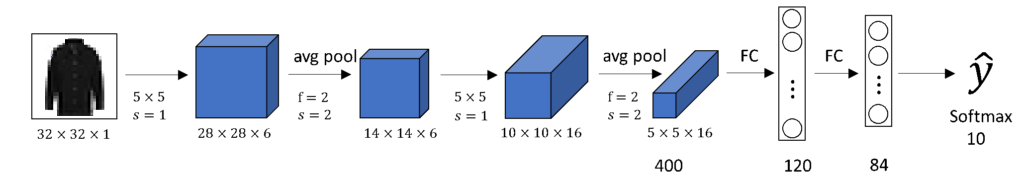

**Summary of LeNet-5 Architecture**

|Layer Type|FeatureMap|Size|Kernel Size|Stride|Activation|
|:-:|:-:|:-:|:-:|:-:|:-:|
|Image|1|32x32|-|-|-|
|Convolution|6|28x28|5x5|1|tanh|
|Average Pooling|6|14x14|2x2|1|-|
|Convolution|16|10x10|5x5|1|tanh|
|Average Pooling|16|5x5|2x2|2|-|
|Fully Connected|-|120|-|-|tanh|
|Fully Connected|-|84|-|-|tanh|
|Fully Connected|-|10|-|-|softmax|

In [2]:
import torch
import torch.nn as nn

In [3]:
class LeNet5(nn.Module):
    def __init__(self, num_classes) -> None:
        super(ConvNeuralNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=5, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out